In [1]:
import pandas as pd
import numpy as np
from glob import glob

glob function used to get all files names that match pattern

# Data Manipulation

In [2]:
files = glob("data/Train_Batch_*.csv")
files

['data\\Train_Batch_1.csv',
 'data\\Train_Batch_2.csv',
 'data\\Train_Batch_3.csv']

In [3]:
dfs = [pd.read_csv(file) for file in files]
print(dfs[0].shape)
print(dfs[1].shape)
print(dfs[2].shape)

(19440, 17)
(12956, 18)
(6466, 19)


There is a problem we will enabeld to concat our data because data files have different columns shape, we need to pre-process every single file alone then concat them!

In [4]:
df1 = dfs[0].copy()
df2 = dfs[1].copy()
df3 = dfs[2].copy()

## Patch 1

In [5]:
print(df1.shape)
print(df1.info())

(19440, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19440 entries, 0 to 19439
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     19440 non-null  object 
 1   Person Description             19440 non-null  object 
 2   Place Code                     19440 non-null  object 
 3   Customer Order                 19440 non-null  object 
 4   Additional Features in market  15140 non-null  object 
 5   Promotion Name                 16530 non-null  object 
 6   Store Kind                     16530 non-null  object 
 7   Store Sales                    19440 non-null  object 
 8   Store Cost                     19440 non-null  object 
 9   Product Weights Data in (KG)   19440 non-null  object 
 10  Is Recyclable?                 19440 non-null  object 
 11  Min. Yearly Income             19437 non-null  object 
 12  Store Area                     174

In [6]:
df1.head(2)

,Unnamed: 0,Person Description,Place Code,Customer Order,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,Product Weights Data in (KG),Is Recyclable?,Min. Yearly Income,Store Area,Grocery Area,Frozen Area,Meat Area,Cost
0,mc_ID_0,"Single Female with four children, education: b...",H11go_ZA,"Cleaning Supplies from Household department, O...","['Video Store', 'Florist', 'Ready Food', 'Coff...",Dimes Off,Deluxe,8.76 Millions,4.2924 Millions,"{'Gross Weight': 28.1997, 'Net Weight': 26.600...",recyclable,10K+,2842.23,2037.64,481.98,323,602.7575
1,mc_ID_1,"Single Female with three children, education: ...",S04ne_WA,"Snack Foods from Snack Foods department, Order...",NaN,Budget Bargains,Supermarket,6.36 Millions,1.9716 Millions,"{'Gross Weight': 16.571, 'Net Weight': 14.972,...",non recyclable,50K+,2814.95,2049.72,457.36,NaN,708.6650


first we need to set our index

In [7]:
def set_index(df):
    df = (
        df
        .rename(columns={"Unnamed: 0": "id"})
        .set_index("id")
    )
    return df

In [8]:
df1 = set_index(df1)
df1.head(2)

,Person Description,Place Code,Customer Order,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,Product Weights Data in (KG),Is Recyclable?,Min. Yearly Income,Store Area,Grocery Area,Frozen Area,Meat Area,Cost
id,,,,,,,,,,,,,,,,
mc_ID_0,"Single Female with four children, education: b...",H11go_ZA,"Cleaning Supplies from Household department, O...","['Video Store', 'Florist', 'Ready Food', 'Coff...",Dimes Off,Deluxe,8.76 Millions,4.2924 Millions,"{'Gross Weight': 28.1997, 'Net Weight': 26.600...",recyclable,10K+,2842.23,2037.64,481.98,323,602.7575
mc_ID_1,"Single Female with three children, education: ...",S04ne_WA,"Snack Foods from Snack Foods department, Order...",NaN,Budget Bargains,Supermarket,6.36 Millions,1.9716 Millions,"{'Gross Weight': 16.571, 'Net Weight': 14.972,...",non recyclable,50K+,2814.95,2049.72,457.36,NaN,708.6650


now we need to split `Person Description` column into `Education Work`, `Marriage`, `Gender`, `Children`, `Degree`, `Work` 

In [9]:
def split_person_description(df):
    
    df[["personal", "Degree Work"]] = (
        df["Person Description"]
        .str
        .split(", education: ", expand=True)
    )
    
    df[["Marriage", "Gender", "blank1", "Children", "blank2"]] = (
        df["personal"]
        .str
        .split(expand=True)
    )
    
    df[["Degree", "Work"]] = (
        df["Degree Work"]
        .str
        .split("working as", expand=True)
    )
    
    df = df.drop(columns=["Person Description", "personal", "blank1", "blank2"])
    return df

In [10]:
df1 = split_person_description(df1)
df1.head(2)

,Place Code,Customer Order,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,Product Weights Data in (KG),Is Recyclable?,Min. Yearly Income,...,Grocery Area,Frozen Area,Meat Area,Cost,Degree Work,Marriage,Gender,Children,Degree,Work
id,,,,,,,,,,,,,,,,,,,,,
mc_ID_0,H11go_ZA,"Cleaning Supplies from Household department, O...","['Video Store', 'Florist', 'Ready Food', 'Coff...",Dimes Off,Deluxe,8.76 Millions,4.2924 Millions,"{'Gross Weight': 28.1997, 'Net Weight': 26.600...",recyclable,10K+,...,2037.64,481.98,323,602.7575,bachelors degree working as professional,Single,Female,four,bachelors degree,professional
mc_ID_1,S04ne_WA,"Snack Foods from Snack Foods department, Order...",NaN,Budget Bargains,Supermarket,6.36 Millions,1.9716 Millions,"{'Gross Weight': 16.571, 'Net Weight': 14.972,...",non recyclable,50K+,...,2049.72,457.36,NaN,708.6650,bachelors degree working as management,Single,Female,three,bachelors degree,management


in `Place Code` column you will see something, that is the second part isn't unique but the first one is unique

In [11]:
df1["Place Code"].value_counts()

T02ma_WA    1802
S01em_OR    1771
P07nd_OR    1668
S03le_WA    1626
H11go_ZA    1508
M10da_YU    1452
S04ne_WA    1411
B06ls_CA    1355
L05es_CA    1322
B14on_WA    1109
V13er_BC    1073
O09ba_VE     861
C15ho_ZA     769
A17co_GU     503
M12ty_DF     429
S18co_CA     253
B08am_WA     228
V19ia_BC     177
G16ra_JA     123
Name: Place Code, dtype: int64

the first part represents the store code, and the second part represents the country ISO2 code [find it here](https://en.wikipedia.org/wiki/ISO_3166-1_alpha-2). 

In [12]:
def split_place_code(df):
    df[["Store Code", "Country ISO2"]] = (
        df["Place Code"]
        .str
        .split("_", expand=True)
    )
    
    df = df.drop(columns="Place Code")
    return df

In [13]:
df1 = split_place_code(df1)
df1.head(3)

,Customer Order,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,Product Weights Data in (KG),Is Recyclable?,Min. Yearly Income,Store Area,...,Meat Area,Cost,Degree Work,Marriage,Gender,Children,Degree,Work,Store Code,Country ISO2
id,,,,,,,,,,,,,,,,,,,,,
mc_ID_0,"Cleaning Supplies from Household department, O...","['Video Store', 'Florist', 'Ready Food', 'Coff...",Dimes Off,Deluxe,8.76 Millions,4.2924 Millions,"{'Gross Weight': 28.1997, 'Net Weight': 26.600...",recyclable,10K+,2842.23,...,323,602.7575,bachelors degree working as professional,Single,Female,four,bachelors degree,professional,H11go,ZA
mc_ID_1,"Snack Foods from Snack Foods department, Order...",NaN,Budget Bargains,Supermarket,6.36 Millions,1.9716 Millions,"{'Gross Weight': 16.571, 'Net Weight': 14.972,...",non recyclable,50K+,2814.95,...,NaN,708.6650,bachelors degree working as management,Single,Female,three,bachelors degree,management,S04ne,WA
mc_ID_2,"Magazines from Periodicals department, Ordered...",['Florist'],Shelf Emptiers,Supermarket,10.86 Millions,4.4526 Millions,"{'Gross Weight': 28.6358, 'Net Weight': 27.182...",recyclable,30K+,2192.32,...,348.85,564.2647,high school degree working as skilled manual,Married,Male,two,high school degree,skilled manual,L05es,CA


now it's order for `Customer Order` column

In [14]:
def split_customer_order(df):
    df[["ord_dep", "Order Brand"]] = (
        df["Customer Order"]
        .str
        .split(", Ordered Brand : ", expand=True)
    )
    
    df[["Order", "Department", "blank"]] = (
        df["ord_dep"]
        .str
        .split("from | department", expand=True)
    )
        
    df = df.drop(columns=["Customer Order", "ord_dep", "blank"])
    return df

In [15]:
df1 = split_customer_order(df1)
df1.head(3)

,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,Product Weights Data in (KG),Is Recyclable?,Min. Yearly Income,Store Area,Grocery Area,...,Marriage,Gender,Children,Degree,Work,Store Code,Country ISO2,Order Brand,Order,Department
id,,,,,,,,,,,,,,,,,,,,,
mc_ID_0,"['Video Store', 'Florist', 'Ready Food', 'Coff...",Dimes Off,Deluxe,8.76 Millions,4.2924 Millions,"{'Gross Weight': 28.1997, 'Net Weight': 26.600...",recyclable,10K+,2842.23,2037.64,...,Single,Female,four,bachelors degree,professional,H11go,ZA,Red Wing,Cleaning Supplies,Household
mc_ID_1,NaN,Budget Bargains,Supermarket,6.36 Millions,1.9716 Millions,"{'Gross Weight': 16.571, 'Net Weight': 14.972,...",non recyclable,50K+,2814.95,2049.72,...,Single,Female,three,bachelors degree,management,S04ne,WA,Nationeel,Snack Foods,Snack Foods
mc_ID_2,['Florist'],Shelf Emptiers,Supermarket,10.86 Millions,4.4526 Millions,"{'Gross Weight': 28.6358, 'Net Weight': 27.182...",recyclable,30K+,2192.32,1322.21,...,Married,Male,two,high school degree,skilled manual,L05es,CA,Excel,Magazines,Periodicals


with `Additional Features in market` column we will split & encode the column into his categories then sum them all and put them in a new column `Amenities Score`

In [16]:
def encode_market_features(df):
    unique_feat = set()
    
    for feat_list in df["Additional Features in market"] :
        if pd.notna(feat_list):
            string_data = feat_list.strip("[]")
            elements = string_data.split(', ')
            elements = [element.strip("'") for element in elements]
            unique_feat.update(elements)

    for feat in unique_feat:
        df[feat] = (
            df["Additional Features in market"]
            .apply(lambda x: 1 if pd.notna(x) and feat in x else 0)
        )
        
    # Amenities Score
    df['Amenities Score'] = (
        df['Coffee Bar'].astype(int) + 
        df['Video Store'].astype(int) + 
        df['Bar For Salad'].astype(int) + 
        df['Florist'].astype(int) +
        df['Ready Food'].astype(int)
    )
    
    df = df.drop(columns=["Additional Features in market",
                          "Bar For Salad",
                          "Ready Food",
                          "Florist",
                          "Coffee Bar",
                          "Video Store"])
    return df

In [17]:
df1 = encode_market_features(df1)
df1.head(3)

,Promotion Name,Store Kind,Store Sales,Store Cost,Product Weights Data in (KG),Is Recyclable?,Min. Yearly Income,Store Area,Grocery Area,Frozen Area,...,Gender,Children,Degree,Work,Store Code,Country ISO2,Order Brand,Order,Department,Amenities Score
id,,,,,,,,,,,,,,,,,,,,,
mc_ID_0,Dimes Off,Deluxe,8.76 Millions,4.2924 Millions,"{'Gross Weight': 28.1997, 'Net Weight': 26.600...",recyclable,10K+,2842.23,2037.64,481.98,...,Female,four,bachelors degree,professional,H11go,ZA,Red Wing,Cleaning Supplies,Household,5
mc_ID_1,Budget Bargains,Supermarket,6.36 Millions,1.9716 Millions,"{'Gross Weight': 16.571, 'Net Weight': 14.972,...",non recyclable,50K+,2814.95,2049.72,457.36,...,Female,three,bachelors degree,management,S04ne,WA,Nationeel,Snack Foods,Snack Foods,0
mc_ID_2,Shelf Emptiers,Supermarket,10.86 Millions,4.4526 Millions,"{'Gross Weight': 28.6358, 'Net Weight': 27.182...",recyclable,30K+,2192.32,1322.21,523.32,...,Male,two,high school degree,skilled manual,L05es,CA,Excel,Magazines,Periodicals,1


In [18]:
df1["Promotion Name"].value_counts()

Save Price                  676
Weekend Discount            660
Two Day Sale                633
Price Winners               579
Super Savers                568
Save It (Sale)              541
One Day Sale                519
Super Duper Savers          508
Roller Savings (High)       497
GLD                         478
Price Slashers              476
Full Free                   463
Shelf Clearing Days         459
Sale : Double Down          457
Lottery Cash Registerion    418
Two for One                 407
Big Time Discounts          400
Go For It                   394
Money Savers                379
Price Destroyers            369
Budget Bargains             360
Saving Days                 351
Discount Frenzy             332
Best Price Savers           327
Price Cutters               323
Dimes Off                   301
Savings Galore              298
Bag Stuffer                 287
Promo Big                   285
You Save Days               283
Sales Days                  279
I Cant B

In [19]:
df1["Store Kind"].value_counts()

Supermarket      7209
Deluxe           6220
Gourmet          1821
Mid-Size          761
Small Grocery     519
Name: Store Kind, dtype: int64

`Promotion Name` & `Store Kind` looks fine for now

we need to transforme `Store Sales` & `Cost Sales` to numercial columns

In [20]:
def transform_cost_sales(df):
    df["Store Sales"] = (
        df["Store Sales"]
        .str
        .split(expand=True)[0]
        .astype(float)
    ) * 1e6
    
    df["Store Cost"] = (
        df["Store Cost"]
        .str
        .split(expand=True)[0]
        .astype(float)
    ) * 1e6
    return df

In [21]:
df1 = transform_cost_sales(df1)
df1.head(3)

,Promotion Name,Store Kind,Store Sales,Store Cost,Product Weights Data in (KG),Is Recyclable?,Min. Yearly Income,Store Area,Grocery Area,Frozen Area,...,Gender,Children,Degree,Work,Store Code,Country ISO2,Order Brand,Order,Department,Amenities Score
id,,,,,,,,,,,,,,,,,,,,,
mc_ID_0,Dimes Off,Deluxe,8760000.0,4292400.0,"{'Gross Weight': 28.1997, 'Net Weight': 26.600...",recyclable,10K+,2842.23,2037.64,481.98,...,Female,four,bachelors degree,professional,H11go,ZA,Red Wing,Cleaning Supplies,Household,5
mc_ID_1,Budget Bargains,Supermarket,6360000.0,1971600.0,"{'Gross Weight': 16.571, 'Net Weight': 14.972,...",non recyclable,50K+,2814.95,2049.72,457.36,...,Female,three,bachelors degree,management,S04ne,WA,Nationeel,Snack Foods,Snack Foods,0
mc_ID_2,Shelf Emptiers,Supermarket,10860000.0,4452600.0,"{'Gross Weight': 28.6358, 'Net Weight': 27.182...",recyclable,30K+,2192.32,1322.21,523.32,...,Male,two,high school degree,skilled manual,L05es,CA,Excel,Magazines,Periodicals,1


now we need to split `Product Weights Data in (KG)` columns data

In [22]:
def extract_product_weights(df):
    if "Product Weights Data in (KG)" in df.columns:
        df[["b1", "Gross Weight", "Net Weight", "Package Weight", "b2"]] = (
            df["Product Weights Data in (KG)"]
            .str
            .split("{'Gross Weight': |, 'Net Weight': |, 'Package Weight': |}", expand=True)
        )
        
        df[["Gross Weight", "Net Weight", "Package Weight"]] = (
            df[["Gross Weight", "Net Weight", "Package Weight"]]
            .astype(float)
        )
        
        df = df.drop(columns=["b1", "b2", "Product Weights Data in (KG)"])
    elif "Weights Data" in df.columns:
        df[["b1", "Gross Weight", "Net Weight", "Package Weight", "b2"]] = (
            df["Weights Data"]
            .str
            .split("{'Gross Weight': |, 'Net Weight': |, 'Package Weight': |}", expand=True)
        )
        
        df[["Gross Weight", "Net Weight", "Package Weight"]] = (
            df[["Gross Weight", "Net Weight", "Package Weight"]]
            .astype(float)
        )
        
        df = df.drop(columns=["b1", "b2", "Weights Data"])
    return df

In [23]:
df1 = extract_product_weights(df1)
df1.head(3)

,Promotion Name,Store Kind,Store Sales,Store Cost,Is Recyclable?,Min. Yearly Income,Store Area,Grocery Area,Frozen Area,Meat Area,...,Work,Store Code,Country ISO2,Order Brand,Order,Department,Amenities Score,Gross Weight,Net Weight,Package Weight
id,,,,,,,,,,,,,,,,,,,,,
mc_ID_0,Dimes Off,Deluxe,8760000.0,4292400.0,recyclable,10K+,2842.23,2037.64,481.98,323,...,professional,H11go,ZA,Red Wing,Cleaning Supplies,Household,5,28.1997,26.6008,1.5990
mc_ID_1,Budget Bargains,Supermarket,6360000.0,1971600.0,non recyclable,50K+,2814.95,2049.72,457.36,NaN,...,management,S04ne,WA,Nationeel,Snack Foods,Snack Foods,0,16.5710,14.9720,1.5990
mc_ID_2,Shelf Emptiers,Supermarket,10860000.0,4452600.0,recyclable,30K+,2192.32,1322.21,523.32,348.85,...,skilled manual,L05es,CA,Excel,Magazines,Periodicals,1,28.6358,27.1822,1.4536


in the second & third patch of this data you will find that `Is Recyclable?` column has diffrenet binary unique values `Yes`, `No`, so we need to make this binary unique values same!

In [24]:
def transform_recyclable(df):
    mapping = {'recyclable': 'yes', 'non recyclable': 'no'}
    df["Is Recyclable?"] = df["Is Recyclable?"].map(mapping)
    return df

In [25]:
df1 = transform_recyclable(df1)
df1.head(3)

,Promotion Name,Store Kind,Store Sales,Store Cost,Is Recyclable?,Min. Yearly Income,Store Area,Grocery Area,Frozen Area,Meat Area,...,Work,Store Code,Country ISO2,Order Brand,Order,Department,Amenities Score,Gross Weight,Net Weight,Package Weight
id,,,,,,,,,,,,,,,,,,,,,
mc_ID_0,Dimes Off,Deluxe,8760000.0,4292400.0,yes,10K+,2842.23,2037.64,481.98,323,...,professional,H11go,ZA,Red Wing,Cleaning Supplies,Household,5,28.1997,26.6008,1.5990
mc_ID_1,Budget Bargains,Supermarket,6360000.0,1971600.0,no,50K+,2814.95,2049.72,457.36,NaN,...,management,S04ne,WA,Nationeel,Snack Foods,Snack Foods,0,16.5710,14.9720,1.5990
mc_ID_2,Shelf Emptiers,Supermarket,10860000.0,4452600.0,yes,30K+,2192.32,1322.21,523.32,348.85,...,skilled manual,L05es,CA,Excel,Magazines,Periodicals,1,28.6358,27.1822,1.4536


in every data patch you will find `Min Yearly Incom` column has different name so we need to transform it and make them all has a unique name.

In [26]:
def transform_income(df):
    if "Min. Yearly Income" in df.columns:
        df["Min. Person Yearly Income"] = (
            df["Min. Yearly Income"]
            .str
            .split("K+", expand=True)[0]
            .astype(float) * 1000
        )
        df = df.drop(columns="Min. Yearly Income")
        
    elif "Min. Person Yearly Income" in df.columns:
        df["Min. Person Yearly Income"] = (
            df["Min. Person Yearly Income"]
            .str
            .split("K+", expand=True)[0]
            .astype(float) * 1000
        )
        
    elif "Yearly Income" in df.columns:
        df["Min. Person Yearly Income"] = (
            df["Yearly Income"]
            .str
            .split("K+", expand=True)[0]
            .astype(float) * 1000
        )
        df = df.drop(columns="Yearly Income")
    return df

In [27]:
df1 = transform_income(df1)
df1.head()

,Promotion Name,Store Kind,Store Sales,Store Cost,Is Recyclable?,Store Area,Grocery Area,Frozen Area,Meat Area,Cost,...,Store Code,Country ISO2,Order Brand,Order,Department,Amenities Score,Gross Weight,Net Weight,Package Weight,Min. Person Yearly Income
id,,,,,,,,,,,,,,,,,,,,,
mc_ID_0,Dimes Off,Deluxe,8760000.0,4292400.0,yes,2842.23,2037.64,481.98,323,602.7575,...,H11go,ZA,Red Wing,Cleaning Supplies,Household,5,28.1997,26.6008,1.5990,10000.0
mc_ID_1,Budget Bargains,Supermarket,6360000.0,1971600.0,no,2814.95,2049.72,457.36,NaN,708.6650,...,S04ne,WA,Nationeel,Snack Foods,Snack Foods,0,16.5710,14.9720,1.5990,50000.0
mc_ID_2,Shelf Emptiers,Supermarket,10860000.0,4452600.0,yes,2192.32,1322.21,523.32,348.85,564.2647,...,L05es,CA,Excel,Magazines,Periodicals,1,28.6358,27.1822,1.4536,30000.0
mc_ID_3,Savings Galore,NaN,1980000.0,673200.0,yes,1974.73,NaN,440.92,293.95,724.5119,...,S03le,WA,Carlson,Dairy,Dairy,1,14.2161,11.2944,2.9217,30000.0
mc_ID_4,Sale Winners,Deluxe,11560000.0,4970800.0,no,2862.3,1872.19,593.93,395.95,519.7574,...,M10da,YU,Hermanos,Vegetables,Produce,5,12.6172,9.7100,2.9072,50000.0


as you see below there is wrong data type columns we need to transform 

In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19440 entries, mc_ID_0 to mc_ID_19354
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Promotion Name             16530 non-null  object 
 1   Store Kind                 16530 non-null  object 
 2   Store Sales                19440 non-null  float64
 3   Store Cost                 19440 non-null  float64
 4   Is Recyclable?             19440 non-null  object 
 5   Store Area                 17483 non-null  object 
 6   Grocery Area               17460 non-null  object 
 7   Frozen Area                17506 non-null  float64
 8   Meat Area                  17492 non-null  object 
 9   Cost                       19416 non-null  float64
 10  Degree Work                19440 non-null  object 
 11  Marriage                   19440 non-null  object 
 12  Gender                     19440 non-null  object 
 13  Children                   19440 non-nu

In [29]:
def transform_columns_type(df):
    df["Store Area"] = (
        df["Store Area"]
        .replace('missing', float('nan'))
        .astype(float)
    )
    
    df["Grocery Area"] = (
        df["Grocery Area"]
        .str
        .strip('"')
        .replace('missing', float('nan'))
        .astype(float)
    )
    
    df["Meat Area"] = (
        df["Meat Area"]
        .str
        .strip('"')
        .astype(float)
    )
    
    trans = ["Gross Weight", "Net Weight", "Package Weight"]
    
    df[trans] = df[trans].astype(float)
    
    return df

In [30]:
df1 = transform_columns_type(df1)
df1.head()

,Promotion Name,Store Kind,Store Sales,Store Cost,Is Recyclable?,Store Area,Grocery Area,Frozen Area,Meat Area,Cost,...,Store Code,Country ISO2,Order Brand,Order,Department,Amenities Score,Gross Weight,Net Weight,Package Weight,Min. Person Yearly Income
id,,,,,,,,,,,,,,,,,,,,,
mc_ID_0,Dimes Off,Deluxe,8760000.0,4292400.0,yes,2842.23,2037.64,481.98,323.00,602.7575,...,H11go,ZA,Red Wing,Cleaning Supplies,Household,5,28.1997,26.6008,1.5990,10000.0
mc_ID_1,Budget Bargains,Supermarket,6360000.0,1971600.0,no,2814.95,2049.72,457.36,NaN,708.6650,...,S04ne,WA,Nationeel,Snack Foods,Snack Foods,0,16.5710,14.9720,1.5990,50000.0
mc_ID_2,Shelf Emptiers,Supermarket,10860000.0,4452600.0,yes,2192.32,1322.21,523.32,348.85,564.2647,...,L05es,CA,Excel,Magazines,Periodicals,1,28.6358,27.1822,1.4536,30000.0
mc_ID_3,Savings Galore,NaN,1980000.0,673200.0,yes,1974.73,NaN,440.92,293.95,724.5119,...,S03le,WA,Carlson,Dairy,Dairy,1,14.2161,11.2944,2.9217,30000.0
mc_ID_4,Sale Winners,Deluxe,11560000.0,4970800.0,no,2862.30,1872.19,593.93,395.95,519.7574,...,M10da,YU,Hermanos,Vegetables,Produce,5,12.6172,9.7100,2.9072,50000.0


now our first data patch are completly fine

## Patch 2

In [31]:
print(df2.shape)
df2.head(3)

(12956, 18)


,Unnamed: 0,Person Description,Place Code,Customer Order,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,Gross Weight,Net Weight,Is Recyclable?,Min. Person Yearly Income,Store Area,Grocery Area,Frozen Area,Meat Area,Cost
0,mc_ID_0,"Single Male with two children, education: high...",S01em_OR,"Baking Goods from Baking Goods department, Ord...","['Video Store', 'Florist', 'Ready Food', 'Bar ...",Tip Top Savings,Deluxe,3.28 M,0.984 M,21.9493,19.0421,yes,30K+,2577.50,1734.50,503.07,335.38,287.1270
1,mc_ID_1,"Married Male with four children, education: hi...",T02ma_WA,"Canned Sardines from Canned Foods department, ...","['Florist', 'Bar For Salad', 'Ready Food', 'Co...",Discount Frenzy,Deluxe,9.35 M,4.2075 M,19.1874,16.1349,yes,30K+,3145.51,2057.74,654.13,NaN,779.6884
2,mc_ID_2,"Married Female with three children, education:...",S04ne_WA,"Frozen Desserts from Frozen Foods department, ...",[],Tip Top Savings,Supermarket,8.4 M,3.192 M,16.7163,12.3555,no,30K+,2811.99,2049.72,457.36,304.91,557.8318


In [32]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12956 entries, 0 to 12955
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     12956 non-null  object 
 1   Person Description             12956 non-null  object 
 2   Place Code                     12956 non-null  object 
 3   Customer Order                 12954 non-null  object 
 4   Additional Features in market  12956 non-null  object 
 5   Promotion Name                 11665 non-null  object 
 6   Store Kind                     11683 non-null  object 
 7   Store Sales                    12955 non-null  object 
 8   Store Cost                     12956 non-null  object 
 9   Gross Weight                   11014 non-null  float64
 10  Net Weight                     11018 non-null  float64
 11  Is Recyclable?                 12956 non-null  object 
 12  Min. Person Yearly Income      12952 non-null 

we will do the same steps on patch two as patch one
- set index
- split person description
- split place code
- split customer order
- encode market features
- transform store cost & store sales
- transform person income

In [33]:
df2 = set_index(df2)
df2 = split_person_description(df2)
df2 = split_place_code(df2)
df2 = split_customer_order(df2)
df2 = encode_market_features(df2)
df2 = transform_cost_sales(df2)
df2 = transform_income(df2)
# df2 = transform_columns_type(df2)
df2.head()

,Promotion Name,Store Kind,Store Sales,Store Cost,Gross Weight,Net Weight,Is Recyclable?,Min. Person Yearly Income,Store Area,Grocery Area,...,Children,Degree,Work,Store Code,Country ISO2,Order Brand,Order,Department,,Amenities Score
id,,,,,,,,,,,,,,,,,,,,,
mc_ID_0,Tip Top Savings,Deluxe,3280000.0,984000.0,21.9493,19.0421,yes,30000.0,2577.50,1734.50,...,two,high school degree,manual,S01em,OR,Landslide,Baking Goods,Baking Goods,1,5
mc_ID_1,Discount Frenzy,Deluxe,9350000.0,4207500.0,19.1874,16.1349,yes,30000.0,3145.51,2057.74,...,four,high school degree,manual,T02ma,WA,Pleasant,Canned Sardines,Canned Foods,1,4
mc_ID_2,Tip Top Savings,Supermarket,8400000.0,3192000.0,16.7163,12.3555,no,30000.0,2811.99,2049.72,...,three,partial college,professional,S04ne,WA,Carrington,Frozen Desserts,Frozen Foods,1,0
mc_ID_3,Price Cutters,NaN,4600000.0,1518000.0,24.1296,NaN,yes,10000.0,2147.17,NaN,...,four,partial high school,manual,V13er,BC,PigTail,Frozen Desserts,Frozen Foods,1,5
mc_ID_4,Money Savers,Supermarket,6810000.0,3200700.0,17.8792,16.4256,no,50000.0,3685.30,2265.90,...,four,partial high school,skilled manual,B14on,WA,Moms,Meat,Deli,1,2


**Oops!**

`Package Weight` column isn't found!!!!!

we need to calculate it `Package Weight` = `Gross Weight` - `Net Weight`

In [34]:
def calculate_package_weight(df):
    df["Package Weight"] = df["Gross Weight"] - df["Net Weight"]
    return df

In [35]:
df2 = calculate_package_weight(df2)
df2.head()

,Promotion Name,Store Kind,Store Sales,Store Cost,Gross Weight,Net Weight,Is Recyclable?,Min. Person Yearly Income,Store Area,Grocery Area,...,Degree,Work,Store Code,Country ISO2,Order Brand,Order,Department,,Amenities Score,Package Weight
id,,,,,,,,,,,,,,,,,,,,,
mc_ID_0,Tip Top Savings,Deluxe,3280000.0,984000.0,21.9493,19.0421,yes,30000.0,2577.50,1734.50,...,high school degree,manual,S01em,OR,Landslide,Baking Goods,Baking Goods,1,5,2.9072
mc_ID_1,Discount Frenzy,Deluxe,9350000.0,4207500.0,19.1874,16.1349,yes,30000.0,3145.51,2057.74,...,high school degree,manual,T02ma,WA,Pleasant,Canned Sardines,Canned Foods,1,4,3.0525
mc_ID_2,Tip Top Savings,Supermarket,8400000.0,3192000.0,16.7163,12.3555,no,30000.0,2811.99,2049.72,...,partial college,professional,S04ne,WA,Carrington,Frozen Desserts,Frozen Foods,1,0,4.3608
mc_ID_3,Price Cutters,NaN,4600000.0,1518000.0,24.1296,NaN,yes,10000.0,2147.17,NaN,...,partial high school,manual,V13er,BC,PigTail,Frozen Desserts,Frozen Foods,1,5,NaN
mc_ID_4,Money Savers,Supermarket,6810000.0,3200700.0,17.8792,16.4256,no,50000.0,3685.30,2265.90,...,partial high school,skilled manual,B14on,WA,Moms,Meat,Deli,1,2,1.4536


In [36]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12956 entries, mc_ID_0 to mc_ID_12955
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Promotion Name             11665 non-null  object 
 1   Store Kind                 11683 non-null  object 
 2   Store Sales                12955 non-null  float64
 3   Store Cost                 12956 non-null  float64
 4   Gross Weight               11014 non-null  float64
 5   Net Weight                 11018 non-null  float64
 6   Is Recyclable?             12956 non-null  object 
 7   Min. Person Yearly Income  12952 non-null  float64
 8   Store Area                 11663 non-null  float64
 9   Grocery Area               11658 non-null  float64
 10  Frozen Area                11657 non-null  object 
 11  Meat Area                  11688 non-null  float64
 12  Cost                       12953 non-null  float64
 13  Degree Work                12956 non-nu

hmmm!

this data looks clean but if you tried it as it's you will find a blank column has unique value is `1` we need to drop it, and there is another issue that `Frozen Area` column is string not float and there is wronge values like `302.61.` we need to handle it too!

In [37]:
df2["Frozen Area"] = (
    df2["Frozen Area"][(df2["Frozen Area"] != '""')]
    .str
    .rstrip('.')
    .astype(float)
)
df2 = df2.drop(columns="")
df2.head()

,Promotion Name,Store Kind,Store Sales,Store Cost,Gross Weight,Net Weight,Is Recyclable?,Min. Person Yearly Income,Store Area,Grocery Area,...,Children,Degree,Work,Store Code,Country ISO2,Order Brand,Order,Department,Amenities Score,Package Weight
id,,,,,,,,,,,,,,,,,,,,,
mc_ID_0,Tip Top Savings,Deluxe,3280000.0,984000.0,21.9493,19.0421,yes,30000.0,2577.50,1734.50,...,two,high school degree,manual,S01em,OR,Landslide,Baking Goods,Baking Goods,5,2.9072
mc_ID_1,Discount Frenzy,Deluxe,9350000.0,4207500.0,19.1874,16.1349,yes,30000.0,3145.51,2057.74,...,four,high school degree,manual,T02ma,WA,Pleasant,Canned Sardines,Canned Foods,4,3.0525
mc_ID_2,Tip Top Savings,Supermarket,8400000.0,3192000.0,16.7163,12.3555,no,30000.0,2811.99,2049.72,...,three,partial college,professional,S04ne,WA,Carrington,Frozen Desserts,Frozen Foods,0,4.3608
mc_ID_3,Price Cutters,NaN,4600000.0,1518000.0,24.1296,NaN,yes,10000.0,2147.17,NaN,...,four,partial high school,manual,V13er,BC,PigTail,Frozen Desserts,Frozen Foods,5,NaN
mc_ID_4,Money Savers,Supermarket,6810000.0,3200700.0,17.8792,16.4256,no,50000.0,3685.30,2265.90,...,four,partial high school,skilled manual,B14on,WA,Moms,Meat,Deli,2,1.4536


now everything is cleaned in patch two

## Patch 3

In [38]:
print(df3.shape)
df3.head(3)

(6466, 19)


,Unnamed: 0,Person%20Description,Place%20Code,Customer%20Order,Additional%20Features%20in%20market,Promotion%20Name,Store%20Kind,Store%20Sales,Store%20Cost,Gross%20Weight,Net%20Weight,Weights%20Data,Is%20Recyclable?,Yearly%20Income,Store%20Area,Grocery%20Area,Frozen%20Area,Meat%20Area,Cost
0,mc_ID_0,"Single Female with two children, education: pa...",T02ma_WA,"Meat from Deli department, Ordered Brand : Red...","['Coffee Bar', 'Florist', 'Ready Food', 'Bar F...",Sale : Double Down,Deluxe,7.12 Millions,2.5632 Millions,23.2575,20.3503,"{'Gross Weight': 23.2575, 'Net Weight': 20.350...",yes,90K+,3145.51,2056.79,654.13,436.09,500.7202
1,mc_ID_1,"Single Female with five children, education: p...",M10da_YU,"Specialty from Produce department, Ordered Bra...","['Coffee Bar', 'Florist', 'Bar For Salad', 'Vi...",GLD,Deluxe,14.72 Millions,7.0656 Millions,16.7163,12.3555,"{'Gross Weight': 16.7163, 'Net Weight': 12.355...",yes,30K+,2856.68,1871.16,595.93,395.51,484.1411
2,mc_ID_2,"Married Male with three children, education: h...",T02ma_WA,"Paper Products from Household department, Orde...","['Coffee Bar', 'Bar For Salad', 'Ready Food', ...",Promo Big,Deluxe,4.98 Millions,2.4402 Millions,10.5531,7.6459,"{'Gross Weight': 10.5531, 'Net Weight': 7.6459...",no,30K+,3140.99,2055.29,654.13,436.09,267.3576


In [39]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6466 entries, 0 to 6465
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           6466 non-null   object 
 1   Person%20Description                 6466 non-null   object 
 2   Place%20Code                         6466 non-null   object 
 3   Customer%20Order                     6466 non-null   object 
 4   Additional%20Features%20in%20market  6466 non-null   object 
 5   Promotion%20Name                     4839 non-null   object 
 6   Store%20Kind                         4840 non-null   object 
 7   Store%20Sales                        6452 non-null   object 
 8   Store%20Cost                         6459 non-null   object 
 9   Gross%20Weight                       5491 non-null   float64
 10  Net%20Weight                         5511 non-null   float64
 11  Weights%20Data                

OOOHHHHH WHAT THIS `%20` IN COLUMN NAME???????????????????????????

In [40]:
df3.columns = df3.columns.str.replace('%20', ' ')
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6466 entries, 0 to 6465
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     6466 non-null   object 
 1   Person Description             6466 non-null   object 
 2   Place Code                     6466 non-null   object 
 3   Customer Order                 6466 non-null   object 
 4   Additional Features in market  6466 non-null   object 
 5   Promotion Name                 4839 non-null   object 
 6   Store Kind                     4840 non-null   object 
 7   Store Sales                    6452 non-null   object 
 8   Store Cost                     6459 non-null   object 
 9   Gross Weight                   5491 non-null   float64
 10  Net Weight                     5511 non-null   float64
 11  Weights Data                   6466 non-null   object 
 12  Is Recyclable?                 6464 non-null   o

now we will do the same steps on patch three as patch one & two
- set index
- split person description
- split place code
- split customer order
- encode market features
- transform store cost & store sales
- transform person income
- calculate package weight

In [41]:
df3 = set_index(df3)
df3 = split_person_description(df3)
df3 = split_place_code(df3)
df3 = split_customer_order(df3)
df3 = encode_market_features(df3)
df3 = transform_cost_sales(df3)
df3 = transform_income(df3)
# df3 = transform_columns_type(df3)
df3.head(3)

,Promotion Name,Store Kind,Store Sales,Store Cost,Gross Weight,Net Weight,Weights Data,Is Recyclable?,Store Area,Grocery Area,...,Degree,Work,Store Code,Country ISO2,Order Brand,Order,Department,,Amenities Score,Min. Person Yearly Income
id,,,,,,,,,,,,,,,,,,,,,
mc_ID_0,Sale : Double Down,Deluxe,7120000.0,2563200.0,23.2575,20.3503,"{'Gross Weight': 23.2575, 'Net Weight': 20.350...",yes,3145.51,2056.79,...,partial high school,professional,T02ma,WA,Red Spade,Meat,Deli,1,4,90000.0
mc_ID_1,GLD,Deluxe,14720000.0,7065600.0,16.7163,12.3555,"{'Gross Weight': 16.7163, 'Net Weight': 12.355...",yes,2856.68,1871.16,...,partial high school,manual,M10da,YU,Tell Tale,Specialty,Produce,1,5,30000.0
mc_ID_2,Promo Big,Deluxe,4980000.0,2440200.0,10.5531,7.6459,"{'Gross Weight': 10.5531, 'Net Weight': 7.6459...",no,3140.99,2055.29,...,high school degree,skilled manual,T02ma,WA,High Quality,Paper Products,Household,1,4,30000.0


as you see there is a column called `Weights Data` that contains `Gross Weight`, `Net Weight`, `Package Weight` but there is columns existing in the table called `Gross Weight`, `Net Weight`

sooooo what do you think which choice is the best????

- calculate `Package Weight` from this existing columns?
- extract this three columns from `Weights Data` and assign it to `Gross Weight`, `Net Weight`, `Package Weight` then drop `Weights Data`?

In [42]:
df3.isna().sum()

Promotion Name               1627
Store Kind                   1626
Store Sales                    14
Store Cost                      7
Gross Weight                  975
Net Weight                    955
Weights Data                    0
Is Recyclable?                  2
Store Area                    315
Grocery Area                  328
Frozen Area                   319
Meat Area                     333
Cost                            4
Degree Work                     0
Marriage                        0
Gender                          0
Children                        0
Degree                          0
Work                            0
Store Code                      0
Country ISO2                    0
Order Brand                     0
Order                           0
Department                      0
                                0
Amenities Score                 0
Min. Person Yearly Income       1
dtype: int64

as you see there is null values in `Gross Weight`, `Net Weight` columns, so the first choice not the best. choosing second one's will fill this nulls with actuals values for every column

In [43]:
df3 = extract_product_weights(df3)
df3 = df3.drop(columns="")
df3.head()

,Promotion Name,Store Kind,Store Sales,Store Cost,Gross Weight,Net Weight,Is Recyclable?,Store Area,Grocery Area,Frozen Area,...,Degree,Work,Store Code,Country ISO2,Order Brand,Order,Department,Amenities Score,Min. Person Yearly Income,Package Weight
id,,,,,,,,,,,,,,,,,,,,,
mc_ID_0,Sale : Double Down,Deluxe,7120000.0,2563200.0,23.2575,20.3503,yes,3145.51,2056.79,654.13,...,partial high school,professional,T02ma,WA,Red Spade,Meat,Deli,4,90000.0,2.9072
mc_ID_1,GLD,Deluxe,14720000.0,7065600.0,16.7163,12.3555,yes,2856.68,1871.16,595.93,...,partial high school,manual,M10da,YU,Tell Tale,Specialty,Produce,5,30000.0,4.3608
mc_ID_2,Promo Big,Deluxe,4980000.0,2440200.0,10.5531,7.6459,no,3140.99,2055.29,654.13,...,high school degree,skilled manual,T02ma,WA,High Quality,Paper Products,Household,4,30000.0,2.9072
mc_ID_3,Price Destroyers,NaN,5240000.0,2043600.0,23.6936,20.6410,no,2841.35,2038.11,481.98,...,partial high school,skilled manual,H11go,ZA,Nationeel,Snack Foods,Snack Foods,5,10000.0,3.0525
mc_ID_4,Save Price,Supermarket,8840000.0,3447600.0,13.6056,10.6839,no,3236.33,2448.37,472.27,...,partial high school,management,O09ba,VE,Better,Canned Soup,Canned Foods,2,110000.0,2.9217


In [44]:
df3.isna().sum()

Promotion Name               1627
Store Kind                   1626
Store Sales                    14
Store Cost                      7
Gross Weight                    0
Net Weight                      0
Is Recyclable?                  2
Store Area                    315
Grocery Area                  328
Frozen Area                   319
Meat Area                     333
Cost                            4
Degree Work                     0
Marriage                        0
Gender                          0
Children                        0
Degree                          0
Work                            0
Store Code                      0
Country ISO2                    0
Order Brand                     0
Order                           0
Department                      0
Amenities Score                 0
Min. Person Yearly Income       1
Package Weight                  0
dtype: int64

now we finished our three patches successfully, let's go to concat them in ou data frame

## Concate All Patches

In [45]:
df = pd.concat([df1, df2, df3])
print(df.shape)
df.head()

(38862, 26)


,Promotion Name,Store Kind,Store Sales,Store Cost,Is Recyclable?,Store Area,Grocery Area,Frozen Area,Meat Area,Cost,...,Store Code,Country ISO2,Order Brand,Order,Department,Amenities Score,Gross Weight,Net Weight,Package Weight,Min. Person Yearly Income
id,,,,,,,,,,,,,,,,,,,,,
mc_ID_0,Dimes Off,Deluxe,8760000.0,4292400.0,yes,2842.23,2037.64,481.98,323.00,602.7575,...,H11go,ZA,Red Wing,Cleaning Supplies,Household,5,28.1997,26.6008,1.5990,10000.0
mc_ID_1,Budget Bargains,Supermarket,6360000.0,1971600.0,no,2814.95,2049.72,457.36,NaN,708.6650,...,S04ne,WA,Nationeel,Snack Foods,Snack Foods,0,16.5710,14.9720,1.5990,50000.0
mc_ID_2,Shelf Emptiers,Supermarket,10860000.0,4452600.0,yes,2192.32,1322.21,523.32,348.85,564.2647,...,L05es,CA,Excel,Magazines,Periodicals,1,28.6358,27.1822,1.4536,30000.0
mc_ID_3,Savings Galore,NaN,1980000.0,673200.0,yes,1974.73,NaN,440.92,293.95,724.5119,...,S03le,WA,Carlson,Dairy,Dairy,1,14.2161,11.2944,2.9217,30000.0
mc_ID_4,Sale Winners,Deluxe,11560000.0,4970800.0,no,2862.30,1872.19,593.93,395.95,519.7574,...,M10da,YU,Hermanos,Vegetables,Produce,5,12.6172,9.7100,2.9072,50000.0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38862 entries, mc_ID_0 to mc_ID_6465
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Promotion Name             33034 non-null  object 
 1   Store Kind                 33053 non-null  object 
 2   Store Sales                38847 non-null  float64
 3   Store Cost                 38855 non-null  float64
 4   Is Recyclable?             38860 non-null  object 
 5   Store Area                 35296 non-null  float64
 6   Grocery Area               35255 non-null  float64
 7   Frozen Area                35309 non-null  float64
 8   Meat Area                  35313 non-null  float64
 9   Cost                       38831 non-null  float64
 10  Degree Work                38862 non-null  object 
 11  Marriage                   38862 non-null  object 
 12  Gender                     38862 non-null  object 
 13  Children                   38862 non-nul

we don't need old index so we will reset it

In [47]:
df = df.reset_index().drop(columns="id")
df.head()

,Promotion Name,Store Kind,Store Sales,Store Cost,Is Recyclable?,Store Area,Grocery Area,Frozen Area,Meat Area,Cost,...,Store Code,Country ISO2,Order Brand,Order,Department,Amenities Score,Gross Weight,Net Weight,Package Weight,Min. Person Yearly Income
0,Dimes Off,Deluxe,8760000.0,4292400.0,yes,2842.23,2037.64,481.98,323.00,602.7575,...,H11go,ZA,Red Wing,Cleaning Supplies,Household,5,28.1997,26.6008,1.5990,10000.0
1,Budget Bargains,Supermarket,6360000.0,1971600.0,no,2814.95,2049.72,457.36,NaN,708.6650,...,S04ne,WA,Nationeel,Snack Foods,Snack Foods,0,16.5710,14.9720,1.5990,50000.0
2,Shelf Emptiers,Supermarket,10860000.0,4452600.0,yes,2192.32,1322.21,523.32,348.85,564.2647,...,L05es,CA,Excel,Magazines,Periodicals,1,28.6358,27.1822,1.4536,30000.0
3,Savings Galore,NaN,1980000.0,673200.0,yes,1974.73,NaN,440.92,293.95,724.5119,...,S03le,WA,Carlson,Dairy,Dairy,1,14.2161,11.2944,2.9217,30000.0
4,Sale Winners,Deluxe,11560000.0,4970800.0,no,2862.30,1872.19,593.93,395.95,519.7574,...,M10da,YU,Hermanos,Vegetables,Produce,5,12.6172,9.7100,2.9072,50000.0


In [48]:
data_without_cleansing = df.copy()

# Data Cleansing

let's check if there is any duplicated values. if any drop them

In [49]:
df.duplicated().sum()

8

In [50]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [51]:
df.isna().sum()

Promotion Name               5828
Store Kind                   5808
Store Sales                    15
Store Cost                      7
Is Recyclable?                  2
Store Area                   3565
Grocery Area                 3606
Frozen Area                  3552
Meat Area                    3547
Cost                           31
Degree Work                     0
Marriage                        0
Gender                          0
Children                        0
Degree                          0
Work                            0
Store Code                      0
Country ISO2                    0
Order Brand                     2
Order                           2
Department                      2
Amenities Score                 0
Gross Weight                 1942
Net Weight                   1938
Package Weight               3578
Min. Person Yearly Income       8
dtype: int64

there is null values need us to handle it

In [52]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

def fill_numerical_nulls(df):
    int_cols = df.select_dtypes(int).columns
    float_cols = df.select_dtypes(float).columns
    cat_cols = df.select_dtypes("object").columns
    
    if "Cost" in df.columns:
        
        imputer = IterativeImputer()
        df[float_cols] = imputer.fit_transform(df[float_cols])
        
        for col in int_cols:
            df[col] = (
                df[col]
                .fillna(df[col].mode()[0])
            )
        
    else:
        imputer = IterativeImputer()
        df[float_cols] = imputer.fit_transform(df[float_cols])
        
        for col in int_cols:
            df[col] = (
                df[col]
                .fillna(df[col].mode()[0])
            )
        
        for col in cat_cols:
            df[col] = (
                df[col]
                .fillna(df[col].mode()[0])
            )

    return df

we will use technique called `IterativeImputer` let's discuss what is the key advantages of it

In [53]:
null_cols = df.select_dtypes("number").isnull().any()
cols_with_nulls = null_cols[null_cols].index.tolist()
cols_with_nulls

['Store Sales',
 'Store Cost',
 'Store Area',
 'Grocery Area',
 'Frozen Area',
 'Meat Area',
 'Cost',
 'Gross Weight',
 'Net Weight',
 'Package Weight',
 'Min. Person Yearly Income']

let's look to the null columns distibution before applying `IterativeImputer`

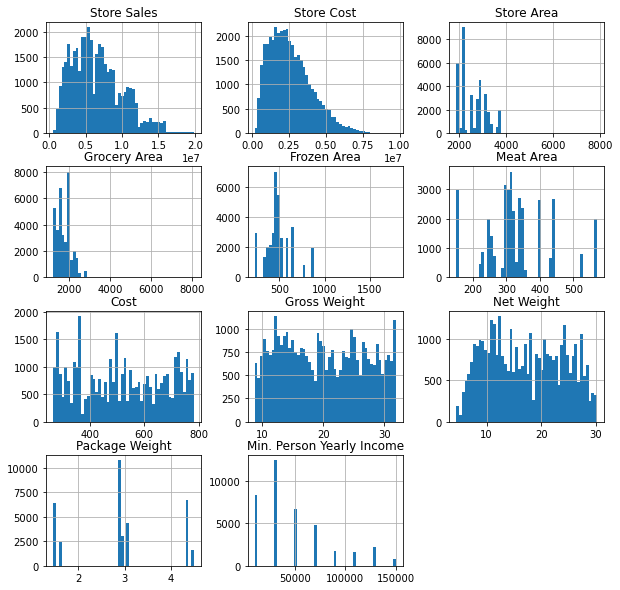

In [54]:
df[cols_with_nulls].hist(figsize=(10, 10), bins=50);

In [55]:
df = fill_numerical_nulls(df)

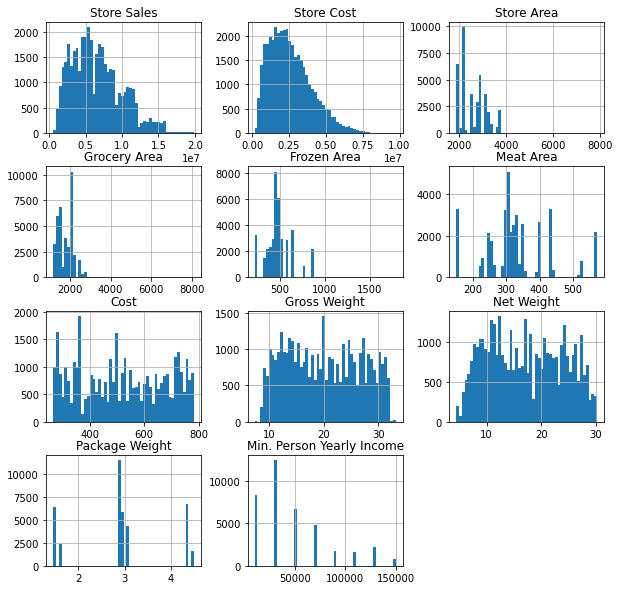

In [56]:
df[cols_with_nulls].hist(figsize=(10, 10), bins=50);

as you can see now, we have filled in the null values in an efficient way, so that we have not changed anything in the distribution. This is because there are a lot of null values, which if we used `SimpleImputer` could lead to an imbalance in the distribution, and you can try that for yourself.

In [57]:
df.isna().sum()

Promotion Name               5828
Store Kind                   5808
Store Sales                     0
Store Cost                      0
Is Recyclable?                  2
Store Area                      0
Grocery Area                    0
Frozen Area                     0
Meat Area                       0
Cost                            0
Degree Work                     0
Marriage                        0
Gender                          0
Children                        0
Degree                          0
Work                            0
Store Code                      0
Country ISO2                    0
Order Brand                     2
Order                           2
Department                      2
Amenities Score                 0
Gross Weight                    0
Net Weight                      0
Package Weight                  0
Min. Person Yearly Income       0
dtype: int64

we will drop other null values

In [58]:
df.dropna(inplace=True)
df.isna().sum()

Promotion Name               0
Store Kind                   0
Store Sales                  0
Store Cost                   0
Is Recyclable?               0
Store Area                   0
Grocery Area                 0
Frozen Area                  0
Meat Area                    0
Cost                         0
Degree Work                  0
Marriage                     0
Gender                       0
Children                     0
Degree                       0
Work                         0
Store Code                   0
Country ISO2                 0
Order Brand                  0
Order                        0
Department                   0
Amenities Score              0
Gross Weight                 0
Net Weight                   0
Package Weight               0
Min. Person Yearly Income    0
dtype: int64

save data for model building and EDA

In [59]:
data_without_cleansing.to_csv("data/data_without_cleansing.csv", index=False)
df.to_csv("data/train_data_cleaned.csv", index=False)

# Wrangle Test Data

test data turn to wrangling!

In [60]:
test = pd.read_csv("data/test.csv")
print(test.shape)
test.head(3)

(19942, 18)


,Unnamed: 0,Person Description,Place Code,Customer Order,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,Gross Weight,Net Weight,Package Weight,Is Recyclable?,Yearly Income,Store Area,Grocery Area,Frozen Area,Meat Area
0,0,"Single Male with four children, education: par...",B06ls_CA,"Candy from Snacks department, Ordered Brand : ...","['Florist', 'Ready Food', 'Video Store', 'Bar ...",Fantastic Discounts,Gourmet,11.76 Millions,4.704 Millions,31.8337,28.7811,3.0525,yes,50K+,2201.06,1424.85,465.54,308.73
1,1,"Married Female with three children, education:...",S01em_OR,"Vegetables from Frozen Foods department, Order...","['Florist', 'Coffee Bar', 'Ready Food', 'Bar F...",Bag Stuffer,Deluxe,2.16 Millions,0.6696 Millions,29.9440,27.0368,2.9072,no,70K+,2577.16,1735.17,505.07,336.59
2,2,"Single Female with three children, education: ...",H11go_ZA,"Dairy from Dairy department, Ordered Brand : Club","['Bar For Salad', 'Video Store', 'Ready Food',...",Pick Your Savings,Deluxe,1.83 Millions,0.8235 Millions,29.2172,26.3100,2.9072,no,130K+,2837.58,2038.11,481.98,321.26


In [61]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19942 entries, 0 to 19941
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     19942 non-null  int64  
 1   Person Description             19942 non-null  object 
 2   Place Code                     19942 non-null  object 
 3   Customer Order                 19942 non-null  object 
 4   Additional Features in market  19942 non-null  object 
 5   Promotion Name                 19916 non-null  object 
 6   Store Kind                     19914 non-null  object 
 7   Store Sales                    19942 non-null  object 
 8   Store Cost                     19942 non-null  object 
 9   Gross Weight                   18959 non-null  float64
 10  Net Weight                     18924 non-null  float64
 11  Package Weight                 19942 non-null  float64
 12  Is Recyclable?                 19942 non-null 

In [62]:
test.isna().sum()

Unnamed: 0                          0
Person Description                  0
Place Code                          0
Customer Order                      0
Additional Features in market       0
Promotion Name                     26
Store Kind                         28
Store Sales                         0
Store Cost                          0
Gross Weight                      983
Net Weight                       1018
Package Weight                      0
Is Recyclable?                      0
Yearly Income                       0
Store Area                        996
Grocery Area                     1042
Frozen Area                       961
Meat Area                         975
dtype: int64

In [63]:
test = set_index(test)
test = split_person_description(test)
test = split_place_code(test)
test = split_customer_order(test)
test = encode_market_features(test)
test = transform_cost_sales(test)
test = transform_income(test)
#test = pre.transform_columns_type(test)
test = fill_numerical_nulls(test)
test = test.drop(columns="")
test.head()

,Promotion Name,Store Kind,Store Sales,Store Cost,Gross Weight,Net Weight,Package Weight,Is Recyclable?,Store Area,Grocery Area,...,Children,Degree,Work,Store Code,Country ISO2,Order Brand,Order,Department,Amenities Score,Min. Person Yearly Income
id,,,,,,,,,,,,,,,,,,,,,
0,Fantastic Discounts,Gourmet,11760000.0,4704000.0,31.8337,28.7811,3.0525,yes,2201.06,1424.85,...,four,partial high school,skilled manual,B06ls,CA,Gulf Coast,Candy,Snacks,5,50000.0
1,Bag Stuffer,Deluxe,2160000.0,669600.0,29.9440,27.0368,2.9072,no,2577.16,1735.17,...,three,graduate degree,professional,S01em,OR,Golden,Vegetables,Frozen Foods,5,70000.0
2,Pick Your Savings,Deluxe,1830000.0,823500.0,29.2172,26.3100,2.9072,no,2837.58,2038.11,...,three,partial high school,management,H11go,ZA,Club,Dairy,Dairy,5,130000.0
3,Price Winners,Deluxe,8820000.0,4410000.0,28.0543,25.0018,3.0525,no,2859.04,1871.16,...,three,partial high school,manual,M10da,YU,Imagine,Frozen Desserts,Frozen Foods,5,10000.0
4,Dollar Days,Supermarket,4320000.0,1987200.0,23.5482,20.6410,2.9072,no,2193.97,1320.15,...,two,high school degree,manual,L05es,CA,BBB Best,Hot Beverages,Beverages,1,30000.0


In [64]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19942 entries, 0 to 19941
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Promotion Name             19942 non-null  object 
 1   Store Kind                 19942 non-null  object 
 2   Store Sales                19942 non-null  float64
 3   Store Cost                 19942 non-null  float64
 4   Gross Weight               19942 non-null  float64
 5   Net Weight                 19942 non-null  float64
 6   Package Weight             19942 non-null  float64
 7   Is Recyclable?             19942 non-null  object 
 8   Store Area                 19942 non-null  float64
 9   Grocery Area               19942 non-null  float64
 10  Frozen Area                19942 non-null  float64
 11  Meat Area                  19942 non-null  float64
 12  Degree Work                19942 non-null  object 
 13  Marriage                   19942 non-null  obj

In [65]:
test.isna().sum()

Promotion Name               0
Store Kind                   0
Store Sales                  0
Store Cost                   0
Gross Weight                 0
Net Weight                   0
Package Weight               0
Is Recyclable?               0
Store Area                   0
Grocery Area                 0
Frozen Area                  0
Meat Area                    0
Degree Work                  0
Marriage                     0
Gender                       0
Children                     0
Degree                       0
Work                         0
Store Code                   0
Country ISO2                 0
Order Brand                  0
Order                        0
Department                   0
Amenities Score              0
Min. Person Yearly Income    0
dtype: int64

we need now to make columns order in test patch as the same on train patch

In [66]:
test = test[df.drop(columns="Cost").columns]
test.head()

,Promotion Name,Store Kind,Store Sales,Store Cost,Is Recyclable?,Store Area,Grocery Area,Frozen Area,Meat Area,Degree Work,...,Store Code,Country ISO2,Order Brand,Order,Department,Amenities Score,Gross Weight,Net Weight,Package Weight,Min. Person Yearly Income
id,,,,,,,,,,,,,,,,,,,,,
0,Fantastic Discounts,Gourmet,11760000.0,4704000.0,yes,2201.06,1424.85,465.54,308.73,partial high school working as skilled manual,...,B06ls,CA,Gulf Coast,Candy,Snacks,5,31.8337,28.7811,3.0525,50000.0
1,Bag Stuffer,Deluxe,2160000.0,669600.0,no,2577.16,1735.17,505.07,336.59,graduate degree working as professional,...,S01em,OR,Golden,Vegetables,Frozen Foods,5,29.9440,27.0368,2.9072,70000.0
2,Pick Your Savings,Deluxe,1830000.0,823500.0,no,2837.58,2038.11,481.98,321.26,partial high school working as management,...,H11go,ZA,Club,Dairy,Dairy,5,29.2172,26.3100,2.9072,130000.0
3,Price Winners,Deluxe,8820000.0,4410000.0,no,2859.04,1871.16,593.93,394.58,partial high school working as manual,...,M10da,YU,Imagine,Frozen Desserts,Frozen Foods,5,28.0543,25.0018,3.0525,10000.0
4,Dollar Days,Supermarket,4320000.0,1987200.0,no,2193.97,1320.15,523.32,348.85,high school degree working as manual,...,L05es,CA,BBB Best,Hot Beverages,Beverages,1,23.5482,20.6410,2.9072,30000.0


In [67]:
test.to_csv("data/test_data_cleaned.csv", index=False)